In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from  sklearn.metrics import silhouette_score
import numpy as np

In [3]:
df = pd.read_csv('../data.csv', index_col=0)
df_scaled = pd.read_csv('../preprocessed_data.csv', index_col=0)

In [6]:
colors = ['deeppink', 'darkgreen', 'brown', 'cyan',
         'grey', 'red', 'blue', 'navy',
         'black', 'orange', 'orchid']

In [ ]:
for link in ['complete', 'average', 'single', 'ward']:
    for n in range(3, 11):
        est_agg = AgglomerativeClustering(n_clusters=n, linkage = link, affinity='euclidean')
        est_agg.fit(df_scaled)
        df['Labels'] = est_agg.labels_
        print('-----------------------')
        print(link)
        print(n)
        print(silhouette_score(df_scaled, est_agg.labels_))

-----------------------
complete
3
0.16111395901587666
-----------------------
complete
4
0.15463340908414164
-----------------------
complete
5
0.10867388502724343
-----------------------
complete
6
0.10899681823968788
-----------------------
complete
7
0.1163346869599695
-----------------------
complete
8
0.08395732844533542
-----------------------
complete
9
0.07767909227419069
-----------------------
complete
10
0.06966049001459615
-----------------------
average
3
0.2709627878327729
-----------------------
average
4
0.24091917722313702
-----------------------
average
5
0.1728780322782311
-----------------------
average
6
0.11372869517045374
-----------------------
average
7
0.0960059077583922
-----------------------
average
8


In [4]:
position_to_num = {
    'GK': 0.0,
    'CB': 1.0,
    'LCB': 1.2,
    'RCB': 1.6,
    'LB': 2.7,
    'RB': 3.2,
    'LWB': 4.5,
    'RWB': 4.6,
    'CM': 6,
    'LCM': 6.2,
    'RCM': 6.4,
    'CDM': 5,
    'LDM': 5.1,
    'RDM': 5.3,
    'LM': 6.5,
    'RM': 6.7,
    'RAM': 7.3,
    'CAM': 7,
    'LAM': 7.1,
    'LW': 8.2,
    'RW': 8.4,
    'CF': 9.1,
    'LF': 9.2,
    'RF': 9.4,
    'LS': 9.5,
    'RS': 9.7,
    'ST': 10
}
df['Position'].replace(position_to_num, inplace=True)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)
pca_df = pca.fit_transform(df_scaled)
pca.explained_variance_
df_pca = pd.DataFrame(pca_df, columns=['pca1', 'pca2', 'pca3'])

In [13]:
est_agg = AgglomerativeClustering(n_clusters=11, linkage = 'single', affinity='euclidean')
est_agg.fit(df_pca)
df['Labels'] = est_agg.labels_
        

In [9]:
from mpl_toolkits.mplot3d import Axes3D

/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


AttributeError: Unknown property azim

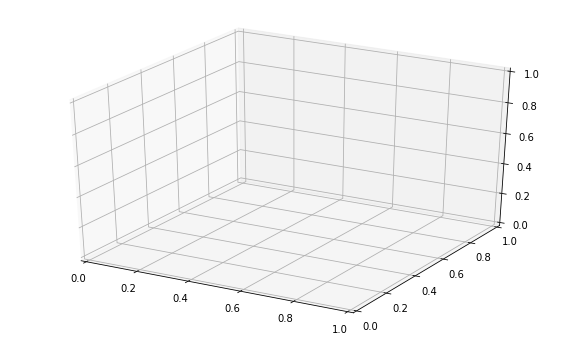

In [18]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')



for i in range(11):
    cluster = df.sample(5000)[df['Labels'] == i]
    ax.scatter(cluster['Position'], cluster['Age'], cluster['Overall'],
                   c=colors[i],)


ax.set_xlabel('Position')
ax.set_ylabel('Age')
ax.set_zlabel('Overall')
plt.savefig('../agglomerative_4_3d_overall_age_position')